## 注意

理解を目的として教科書通りに実装。  
もっと高速なアルゴリズムはあると思う。  

{w0: 9.28356164383562, w1: -1.80365296803653}


NameError: name 'w1' is not defined

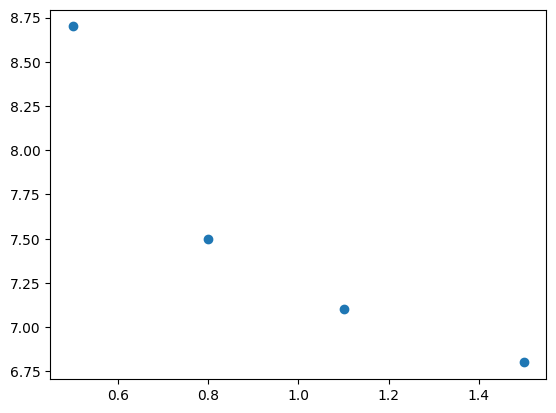

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

x = [[0.5, 8.7], [0.8, 7.5], [1.1, 7.1], [1.5, 6.8]]

# 変数の定義
w0 = sp.Symbol('w0')
w1 = sp.Symbol('w1')

# 重みを学習
def train(x):
  # 教師データと直線の誤差(y)を計算
  d = 0
  for i in range(len(x)):
    d += (x[i][1] - (w0 + w1 * x[i][0]))**2

  # 誤差を最小にするw0, w1を求める
  v0 = sp.diff(d, w0)
  v1 = sp.diff(d, w1)

  # 連立方程式を解く
  w = sp.solve([v0, v1], [w0, w1])
  print(w)

  return w

w = train(x)

# データをx座標とy座標に分割
x_coords = [i[0] for i in x]
y_coords = [i[1] for i in x]

# プロット
plt.scatter(x_coords, y_coords)

# 回帰直線のプロット
x_values = np.linspace(0, 1.5)
y_values = w[w1] * x_values + w[w0]

plt.plot(x_values, y_values, color='red')

# グラフのタイトルと軸のラベルを設定
plt.title('Plot of the given data')
plt.xlabel('x')
plt.ylabel('y')

# グラフを表示
plt.show()

## 独立変数がN次元版

{w0: 9.28356164383562, w1: -1.80365296803653}


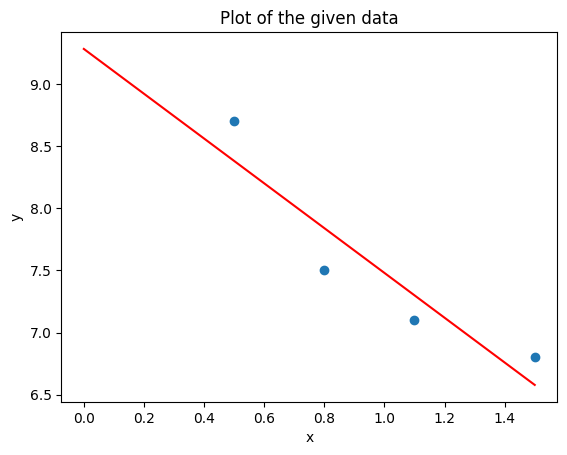

In [51]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

x = [[0.5, 8.7], [0.8, 7.5], [1.1, 7.1], [1.5, 6.8]]

# 重みを学習
def train(x):
  # 変数の定義
  w = [0] * len(x[0])
  for i in range(0, len(x[0])):
    w[i] = sp.Symbol('w' + str(i))

  # 教師データと直線の誤差(y)を計算
  d = 0
  for i in range(len(x)):
    y = w[0]
    for n in range(1, len(x[0])):
      y += w[n] * x[i][0]
    d += (x[i][1] - y)**2

  # 誤差を最小にするw0, w1を求める
  v = [0] * len(x[0])
  for i in range(0, len(x[0])):
    v[i] = sp.diff(d, w[i])

  # 連立方程式を解く
  w = sp.solve(v, w)
  print(w)

  return w

w = train(x)

# データをx座標とy座標に分割
x_coords = [i[0] for i in x]
y_coords = [i[1] for i in x]

# プロット
plt.scatter(x_coords, y_coords)

# 回帰直線のプロット
x_values = np.linspace(0, 1.5)
y_values = w[w1] * x_values + w[w0]

plt.plot(x_values, y_values, color='red')

# グラフのタイトルと軸のラベルを設定
plt.title('Plot of the given data')
plt.xlabel('x')
plt.ylabel('y')

# グラフを表示
plt.show()